In [4]:
from math import floor
import numpy as np
import pandas as pd
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\MARCELO\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:

columns = {'arch':0,'silhouette':1, 'homogeneity':2, 'clusters':0, 'affinity':0, 'linkage':0}

alfa_columns = ['arch', 'affinity', 'linkage']
percentual_columns = ['homogeneity']
numbered_columns = ['silhouette', 'clusters']

In [6]:
'''
NOTE THAT THE "NORMAL 2" PATTERN COULD BE OUT OF PATTERN. REQUIRED 2 LINES as 2x2 array. IF THIS HAPPENED, MUST BE MANUALLY CONVERTED TO THE REQUIRED PATTERN AS BELOW!

REQUIRED
[[1. 0.]
 [0. 0.]]

OUT OF PATTERN
[[1.]]
'''

with open('./outputs/output_dbscan_pca095_dr_2-ts_0.8-lf_1-limit_500-wl_1.txt') as f:
    lines = f.readlines()

height = 3
times = floor(len(lines)/height)

output = pd.DataFrame(np.zeros((times, len(columns))), columns=columns)

for k, column_name in enumerate(columns):
    column_init_position = columns[column_name]

    for time in np.arange(0, times):
        line_number = column_init_position+(time*height)
        value = lines[line_number].rstrip("\n")

        if (column_name in alfa_columns):
            if (column_name == 'affinity'):
                value = value.split()[-2:-1]
            elif (column_name == 'linkage'):
                value = value.split()[-1:]
            else:
                value = " ".join(value.split()[3:-3])
        elif (column_name in percentual_columns):
            value = float(value)*100
        elif (column_name in numbered_columns):
            if (column_name == 'clusters'):
                value = value.split()[-3:-2]
            else:
                value = float(value)




        output.iloc[time,k] = value

f.close()

In [7]:
grouped = output.groupby(['clusters', 'affinity', 'linkage'])

homogeneity = []
silhouette = []
keys = []
for g in grouped.groups.keys():
    silhouette.append(grouped.get_group(g)['silhouette'].to_list())
    homogeneity.append(grouped.get_group(g)['homogeneity'].to_list())

    keys.append(g)


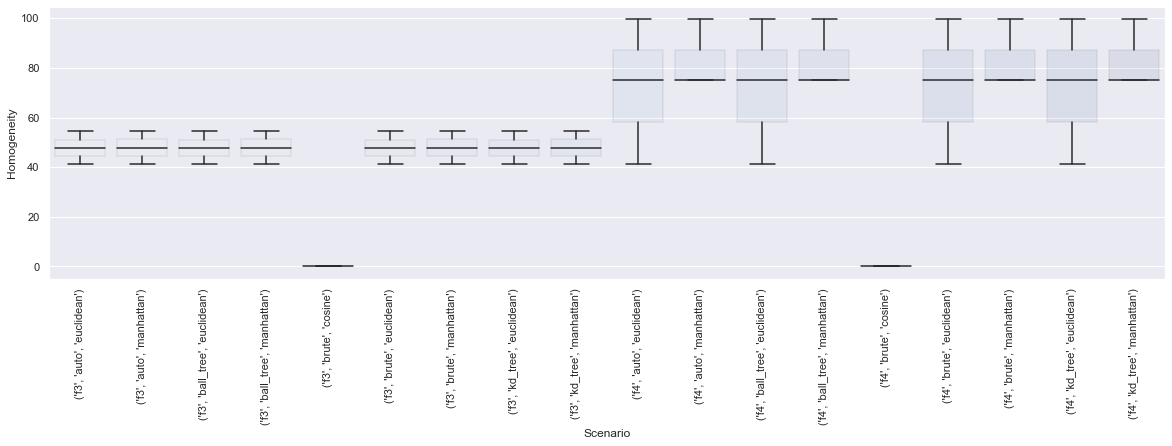

In [8]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.boxplot(data=homogeneity, palette='Blues',boxprops=dict(alpha=0.08))
ax.set(xlabel='Scenario', ylabel='Homogeneity')
ax.set_xticklabels(keys, rotation=90)
pp = 0

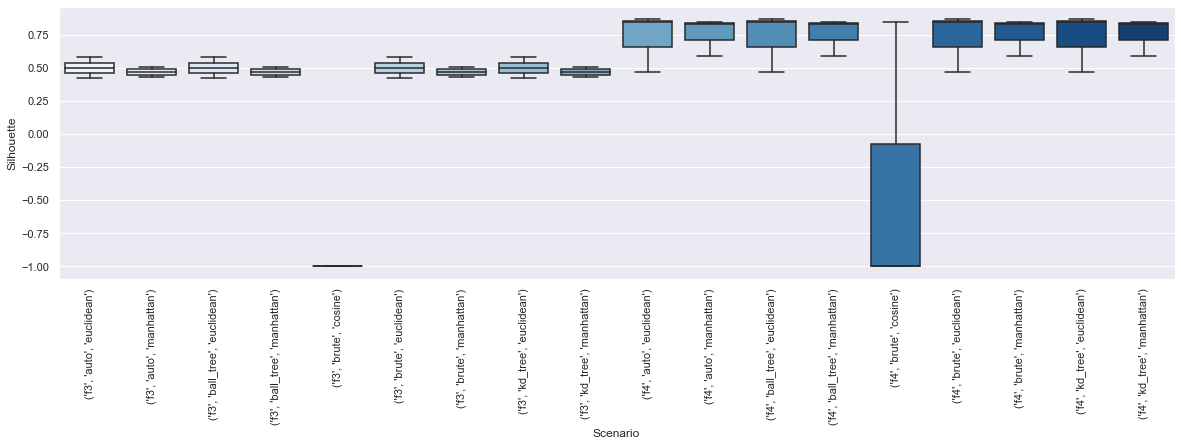

In [9]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.boxplot(data=silhouette, palette='Blues')
ax.set(xlabel='Scenario', ylabel='Silhouette')
ax.set_xticklabels(keys, rotation=90)
pp = 0